In [109]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [110]:
m = 10000
n = 1000
w1 = np.array([[0.]])  # shape(n, 1)
w2 = np.array([[0.]])  # shape(n, 1)
b1 = np.array([[0.]])
b2 = np.array([[0.]])
k = 50000
alpha = 0.001
cost_arr = list()

In [111]:
def generate_dataset(size):
    x_train = list()
    y_train = list()
    for i in range(size):
        degree_value = random.uniform(0, 360)
        sine_value = math.sin(math.radians(degree_value))
        x_train.append(degree_value)
        if sine_value > 0:
            y_train.append(1)
        else:
            y_train.append(0)
    x_train = np.array(x_train).reshape(1, len(x_train))
    y_train = np.array(y_train).reshape(1, len(y_train))
    return x_train, y_train

In [112]:
def logistic_regression(X, Y):
    global w1, w2, b1, b2, cost_arr
    Z1 = np.dot(w1.T, X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    A1 = np.clip(A1, 1e-12, 1 - 1e-12)
    Z2 = np.dot(w2.T, A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    A2 = np.clip(A2, 1e-12, 1 - 1e-12)

    cost_arr.append(-np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)))

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(w2.T, dZ2) * (A1 * (1 - A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True)

    w2 = w2 - alpha * dW2
    b2 = b2 - alpha * db2
    w1 = w1 - alpha * dW1
    b1 = b1 - alpha * db1

In [113]:
def testing_accuracy_and_cost(size, X, Y):
    accuracy = 0
    Z1 = np.dot(w1.T, X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    A1 = np.clip(A1, 1e-12, 1 - 1e-12)
    Z2 = np.dot(w2.T, A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    A2 = np.clip(A2, 1e-12, 1 - 1e-12)
    for i in range(size):
        if A2[0, i] > 0.5 and Y[0, i] == 1:
            accuracy += 1
        elif A2[0, i] < 0.5 and Y[0, i] == 0:
            accuracy += 1
    accuracy = accuracy / size * 100
    cost = -np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    return accuracy, cost

[[-0.00692175]] [[0.09987221]] [[0.00849515]] [[-1.77103164]]
[[-0.02369714]] [[3.66037285]] [[0.06212523]] [[-1.7961826]]
[[-0.04408407]] [[7.5508109]] [[0.15505742]] [[-1.84204479]]
[[-0.06130898]] [[10.71910782]] [[0.25792521]] [[-1.88931174]]
[[-0.07663545]] [[13.51027111]] [[0.36386752]] [[-1.93462667]]
[[-0.09065885]] [[16.05332318]] [[0.47079053]] [[-1.97684224]]
[[-0.10368592]] [[18.41038242]] [[0.57772983]] [[-2.01533785]]
[[-0.11590327]] [[20.61803902]] [[0.68413231]] [[-2.04965727]]
[[-0.12743597]] [[22.70036097]] [[0.78962973]] [[-2.07938016]]
[[-0.13837246]] [[24.67418694]] [[0.89394605]] [[-2.10405989]]
[[-0.14877728]] [[26.55172313]] [[0.9968527]] [[-2.12318215]]
[[-0.15869819]] [[28.34198278]] [[1.09814391]] [[-2.13612712]]
[[-0.16817052]] [[30.05164741]] [[1.19762165]] [[-2.14212536]]
[[-0.17721982]] [[31.68560438]] [[1.29508507]] [[-2.14019776]]
[[-0.18586363]] [[33.24728616]] [[1.39032215]] [[-2.12906586]]
[[-0.19411232]] [[34.73887693]] [[1.48310205]] [[-2.10700824]

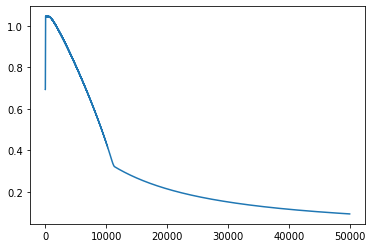

In [114]:
if __name__ == '__main__':
    x_train, y_train = generate_dataset(m)
    x_test, y_test = generate_dataset(n)
    for i in range(1, k+1):
        logistic_regression(x_train, y_train)
        if i % 500 == 0:
            print(w1, b1, w2, b2)
    plt.plot(cost_arr)
    print(testing_accuracy_and_cost(m, x_train, y_train))
    print(testing_accuracy_and_cost(n, x_test, y_test))